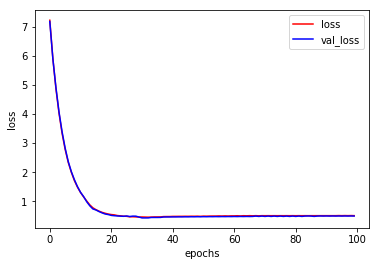

In [8]:
# write your code here
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file
import matplotlib.pyplot as plt
import math


# 计算loss
def compute_loss(W,b,X,y):
    loss = 0
    y_pre = np.dot(X,W.T) + b
    for i in range(len(y_pre)):
        if y_pre[i] > 0:
            y_pre[i] = 1
        else:
            y_pre[i] = -1
    for y_,y_p in zip(y,y_pre):
        loss += max(0, 1 - y_*y_p) 
    return loss/len(y)+np.sum(W**2)/2


def compute_gradient(W,b,X,y,learning_rate):
    b_gradient = 0
    W_gradient = np.zeros(W.shape)
    
    # 计算偏导数
    for j in range(len(W)):
        for i in range(len(y)):
            if 1 - y[i]*(np.sum(X[i]*W ) +b ) > 0:
                W_gradient[j] += (W[j]-y[i]*X[i][j])
            else:
                W_gradient[j] += W[j]
                
    for i in range(len(y)):
        if 1 - y[i]*(np.sum(X[i]*W) +b ) > 0:
            b_gradient += (-y[i])
     
    # 更新参数
    W = W - learning_rate*W_gradient/len(y)
    b = b - learning_rate*b_gradient/len(y)
    
    return W,b

def optimizer(X,y,X_test,y_test,W,b,learning_rate,epoch):
    train_loss = []
    dev_loss = []
    iteration = []
    for i in range(epoch):
        W,b =compute_gradient(W,b,X,y,learning_rate)
        train_loss.append(compute_loss(W,b,X,y))
        dev_loss.append(compute_loss(W,b,X_test,y_test))
        iteration.append(i)
        # print((i ,compute_loss(W,b,X,y)))
    return train_loss,dev_loss


if __name__ == '__main__':
    
    # 加载数据
    data = load_svmlight_file(f=r"E:\machine learning\lab1\australian")
    
    # 将数据中的特征和标签分开
    n_x = data[0]
    n_y = data[1]
    
    X = []
    for i in n_x:
        for j in range(14):
            X.append(i[0,j])
    X = np.array(X).reshape(690,14)
        
    # 分割测试集，验证集
    X_train, X_test, y_train, y_test = train_test_split(X, n_y, test_size=0.2)
    
    # 初始化参数
    w = np.random.normal(size=14)
    b = np.random.normal(size=1)
    learning_rate = 0.1
    epoch = 100
    
    # 记录loss随迭代次数的值
    losses = []
    
    # 记录验证集的loss随迭代次数的值
    val_losses = []
    
    train_loss,val_losses = optimizer(X_train,y_train,X_test,y_test,w,b,learning_rate,epoch)

    
    # loss随迭代次数的变化图
    plt.plot(range(epoch), train_loss, label="loss", color='red')
    plt.plot(range(epoch), val_losses, label="val_loss", color='blue')
    plt.xlabel("epochs")
    plt.ylabel('loss')
    plt.legend()
    plt.show()
    